In [59]:
import Act2Vec, Trace2Vec, Log2Vec, Model2Vec
import gensim
import loadXES
import numpy as np

In [4]:
logName = 'BPIC15GroundTruth'
vectorsize = 16
Trace2Vec.learn(logName, vectorsize)

Data Loading finished,  5649  traces found.


c:\users\seppe\anaconda3\lib\site-packages\gensim\models\doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


Now training epoch 0
Now training epoch 2
Now training epoch 4
Now training epoch 6
Now training epoch 8
Data Loading finished,  5649  traces found.
inferring vectors
done
done with  KMeans  on event log  BPIC15GroundTruth


In [12]:
corpus = loadXES.get_doc_XES_tagged(logName + '.xes')
model = gensim.models.Doc2Vec.load('./output/' + logName + 'T2VVS' + str(vectorsize) + '.model')

vectors = []
for doc_id in range(len(corpus)):
    inferred_vector = model.infer_vector(corpus[doc_id].words)
    vectors.append(inferred_vector)

In [13]:
vectors[1]

array([ 0.17496702, -0.060852  , -0.01952708,  0.04475012, -0.16433048,
       -0.51045883,  0.08402991,  0.05315412,  0.10239666, -0.13646917,
        0.20116252, -0.39072186,  0.02045596, -0.02320048,  0.11999528,
        0.07675023], dtype=float32)

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(vectors)

print ('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [ 0.18113114  0.1165044 ]


In [19]:
pca_result

array([[-0.27382041,  0.35188659],
       [-0.26883433,  0.16716991],
       [-0.445204  ,  0.26682455],
       ..., 
       [ 0.02491211, -0.13958935],
       [-0.34113647, -0.21423936],
       [-0.31050436, -0.50490843]])

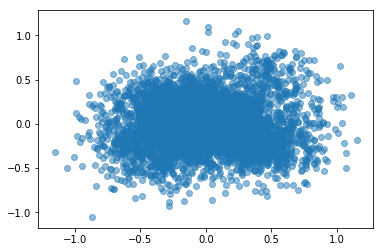

In [21]:
import matplotlib.pyplot as plt

plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.5)
plt.show()

In [22]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(vectors)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5649 samples in 0.021s...
[t-SNE] Computed neighbors for 5649 samples in 1.428s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5649
[t-SNE] Computed conditional probabilities for sample 2000 / 5649
[t-SNE] Computed conditional probabilities for sample 3000 / 5649
[t-SNE] Computed conditional probabilities for sample 4000 / 5649
[t-SNE] Computed conditional probabilities for sample 5000 / 5649
[t-SNE] Computed conditional probabilities for sample 5649 / 5649
[t-SNE] Mean sigma: 0.126523
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.970993
[t-SNE] Error after 300 iterations: 2.572026


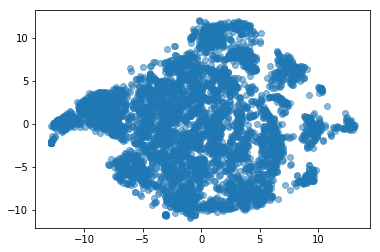

In [23]:
plt.scatter(tsne_results[:,0], tsne_results[:,1], alpha=0.5)
plt.show()

In [34]:
dictionary = set([word for doc in corpus for word in doc.words])

In [35]:
dictionary

{'01_BB',
 '01_HOOFD',
 '01_OLO',
 '02_DRZ',
 '02_OLO',
 '03_GBH',
 '03_VD',
 '04_BPT',
 '05_EIND',
 '06_OLO',
 '06_VD',
 '07_OPS',
 '08_AWB45',
 '08_OLO',
 '09_AH',
 '09_AWB45',
 '10_OLO',
 '10_UOV',
 '11_AH',
 '11_OLO',
 '12_AP',
 '13_CRD',
 '14_VRIJ',
 '15_NGV',
 '16_LGSD',
 '16_LGSV',
 '99_NOCODE',
 'ArtificialEndTask',
 'ArtificialStartTask'}

In [36]:
trlen = [len(doc.words) for doc in corpus]

In [168]:
dl = list(dictionary)
dl.remove('01_HOOFD')
dl.remove('ArtificialStartTask')
dl.remove('ArtificialEndTask')
wordcounts = [{ d : sum([d == w for w in c.words]) for d in dl } for c in corpus]
maxw = [max(wc, key=wc.get) for wc in wordcounts]

In [181]:
wordcounts[0]

{'02_DRZ': 1,
 '01_OLO': 0,
 '11_AH': 1,
 '03_GBH': 0,
 '06_VD': 0,
 '07_OPS': 0,
 '12_AP': 0,
 '15_NGV': 0,
 '11_OLO': 0,
 '02_OLO': 0,
 '10_OLO': 0,
 '13_CRD': 1,
 '16_LGSD': 0,
 '01_BB': 0,
 '14_VRIJ': 0,
 '10_UOV': 0,
 '05_EIND': 0,
 '09_AH': 1,
 '06_OLO': 0,
 '08_OLO': 0,
 '09_AWB45': 0,
 '16_LGSV': 0,
 '03_VD': 0,
 '04_BPT': 1,
 '08_AWB45': 1,
 '99_NOCODE': 0}

In [170]:
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(dl)))
cmap = [colors[dl.index(m)] for m in maxw]

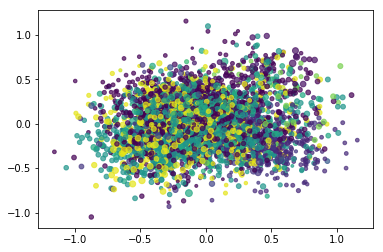

In [172]:
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.7, s=trlen, c=cmap)
plt.show()

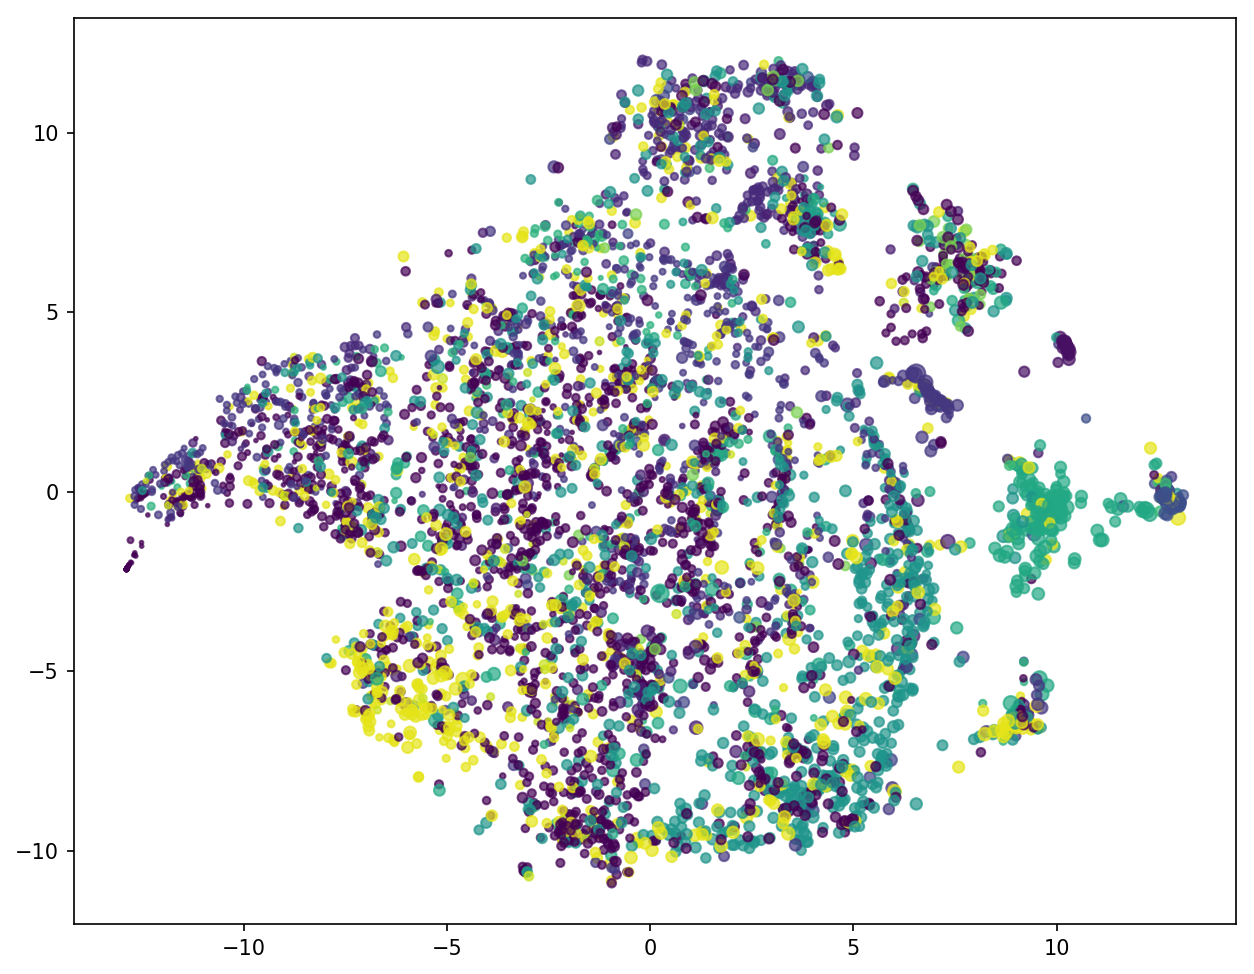

In [171]:
plt.figure(figsize=(10, 8), dpi=150)
plt.scatter(tsne_results[:,0], tsne_results[:,1], alpha=.7, s=trlen, c=cmap)
plt.show()

In [113]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20).fit(tsne_results)
#kmeans.labels_

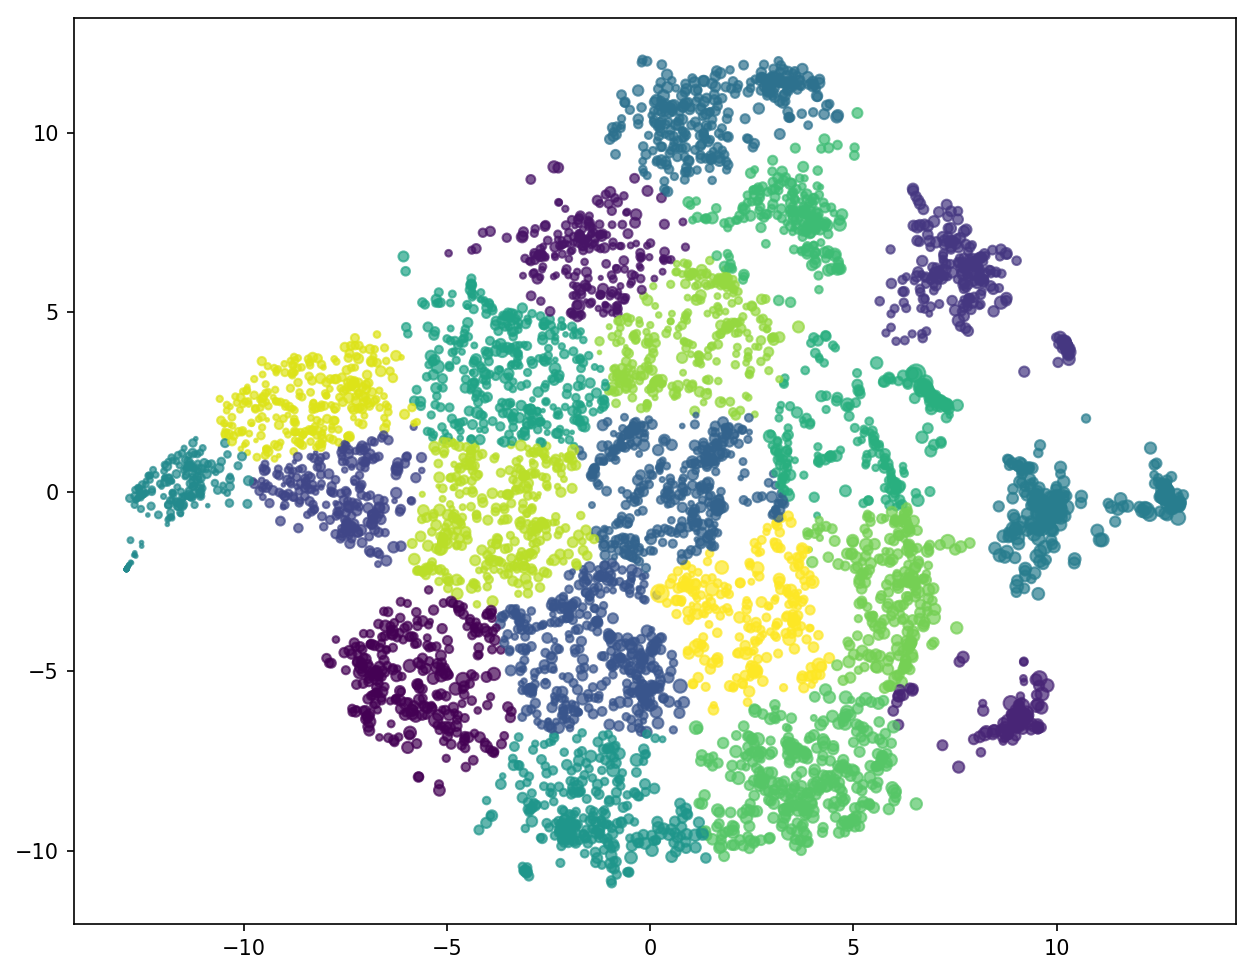

In [114]:
plt.figure(figsize=(10, 8), dpi=150)
plt.scatter(tsne_results[:,0], tsne_results[:,1], alpha=.7, s=trlen, c=kmeans.labels_)
plt.show()

In [115]:
from sklearn.feature_extraction.text import CountVectorizer
traces = [' '.join(c.words) for c in corpus]
count_vec = CountVectorizer(ngram_range=(1, 2))
count_train = count_vec.fit(traces)
bag_of_words = count_vec.transform(traces).todense()

In [116]:
bag_of_words

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [2, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [120]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(bag_of_words, kmeans.labels_)

In [121]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Text(0.5,15,'Predicted label')

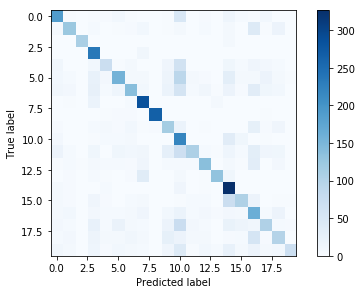

In [122]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(kmeans.labels_, clf.predict(bag_of_words))

plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(set(kmeans.labels_)))
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [163]:
from imblearn.over_sampling import RandomOverSampler

clf = tree.DecisionTreeClassifier(max_depth=10)
y = [1 if x == 0 else 0 for x in kmeans.labels_]
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_sample(bag_of_words, y)
clf = clf.fit(X_resampled, y_resampled)
cnf_matrix = confusion_matrix(y, clf.predict(bag_of_words))
cnf_matrix

array([[3878, 1474],
       [  30,  267]], dtype=int64)

In [164]:
map_feat = lambda feat : next((gr for gr, mp in count_train.vocabulary_.items() if mp == feat), None)

In [165]:
'{} <= {}'.format(map_feat(clf.tree_.feature[0]), clf.tree_.threshold[0])

'01_hoofd 08_awb45 <= 0.5'

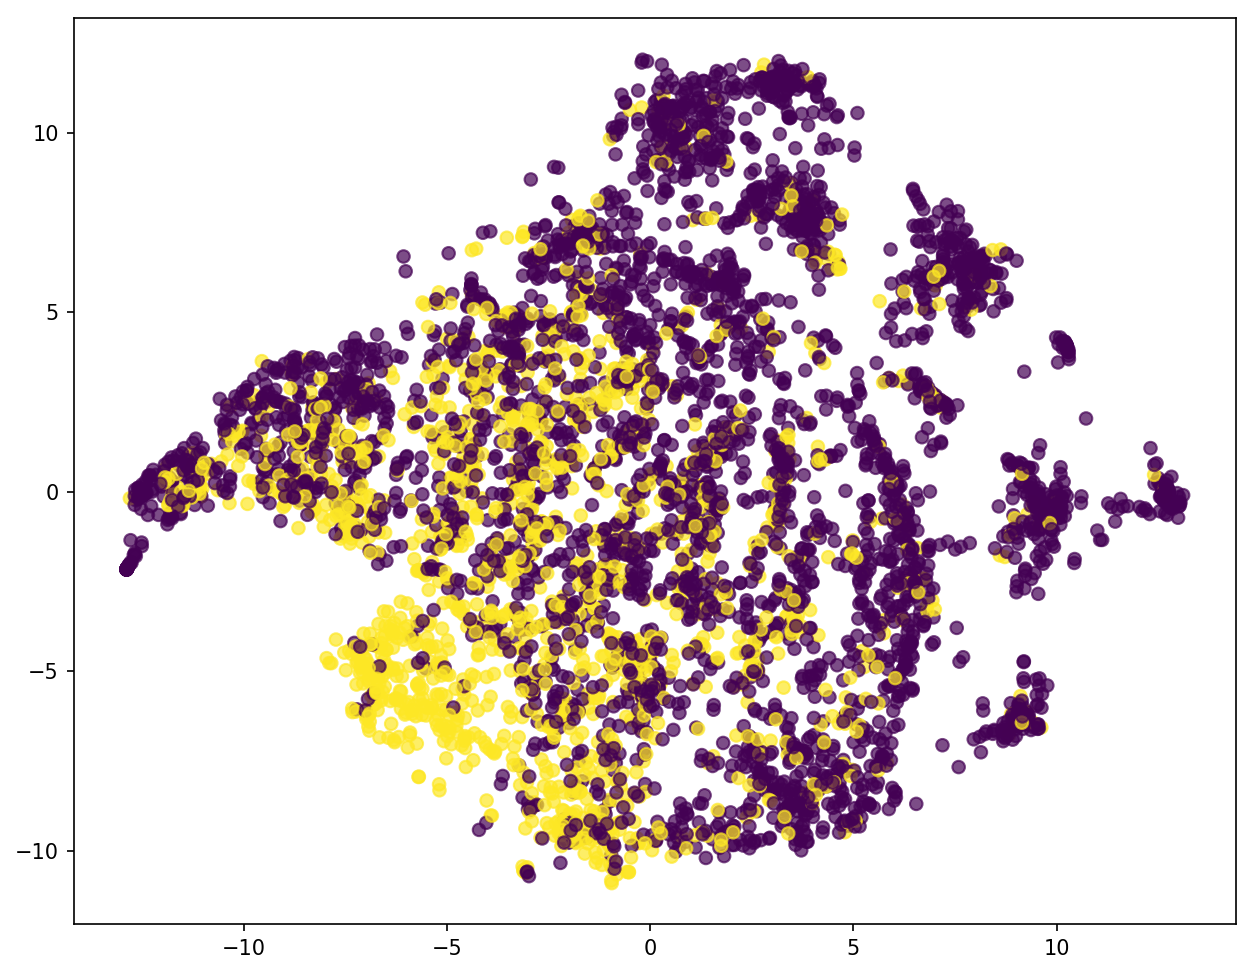

In [166]:
ts = [1 if ]
plt.figure(figsize=(10, 8), dpi=150)
plt.scatter(tsne_results[:,0], tsne_results[:,1], alpha=.7, c=clf.predict(bag_of_words))
plt.show()

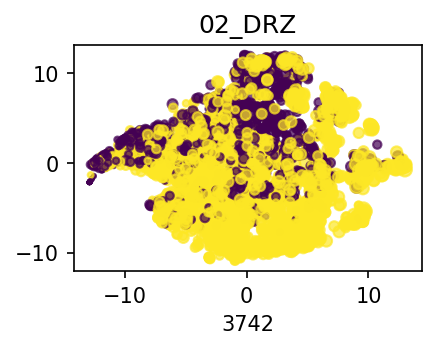

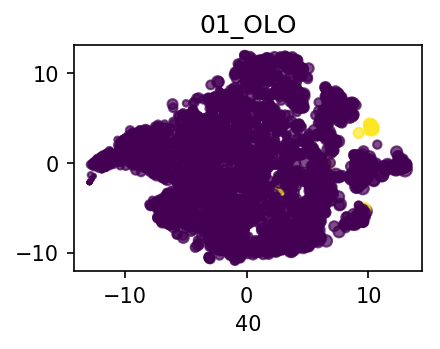

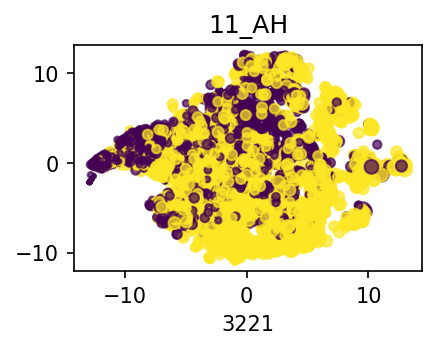

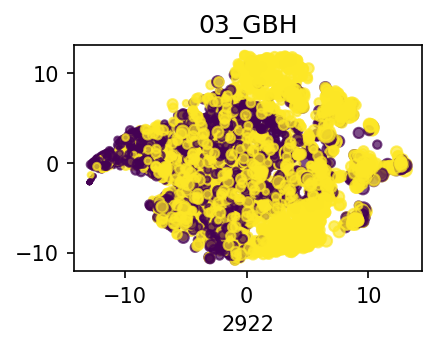

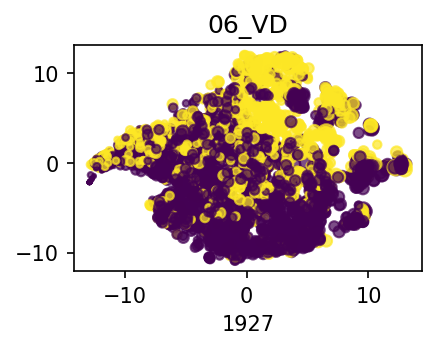

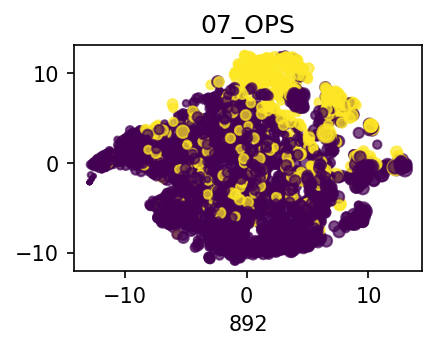

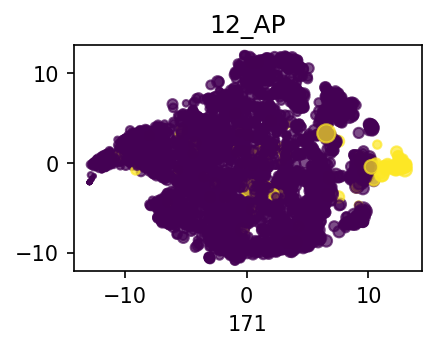

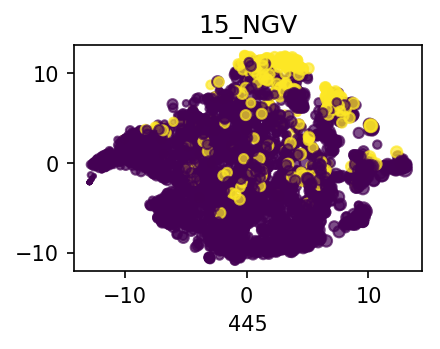

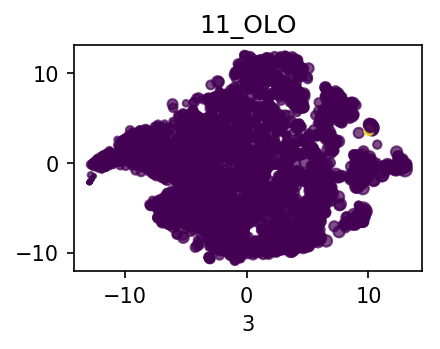

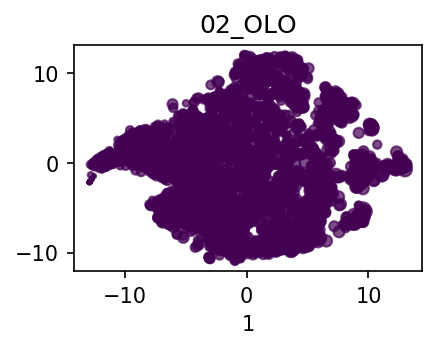

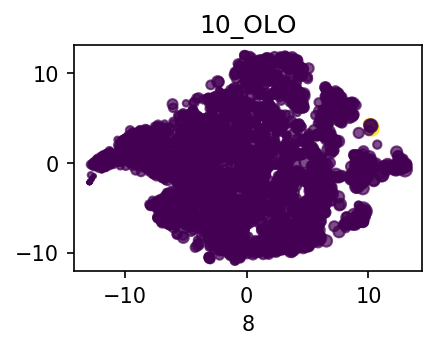

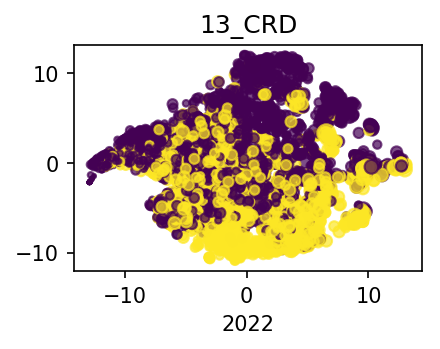

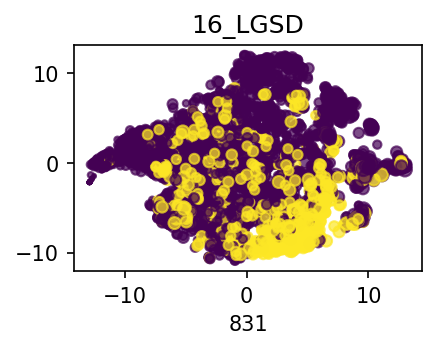

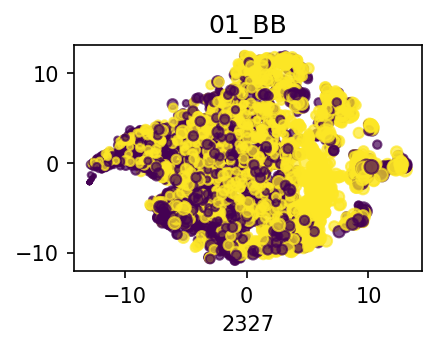

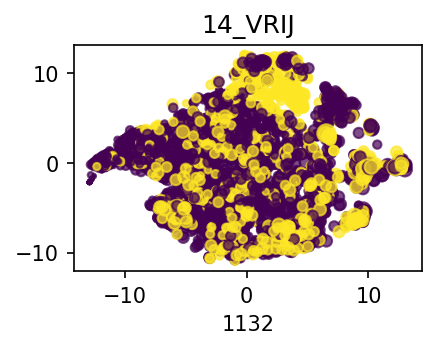

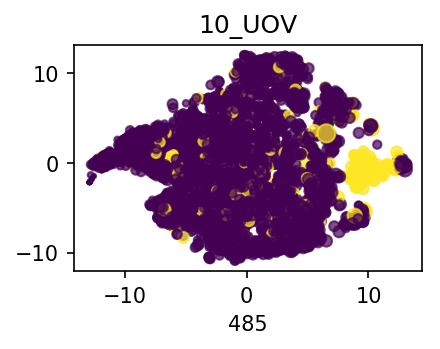

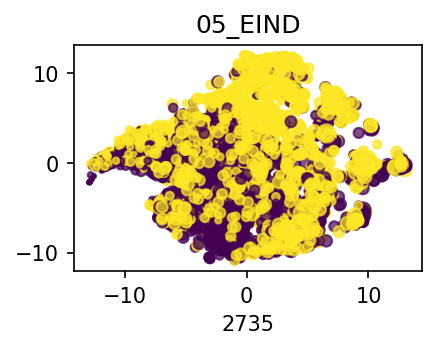

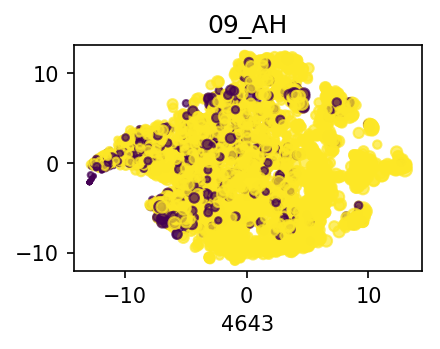

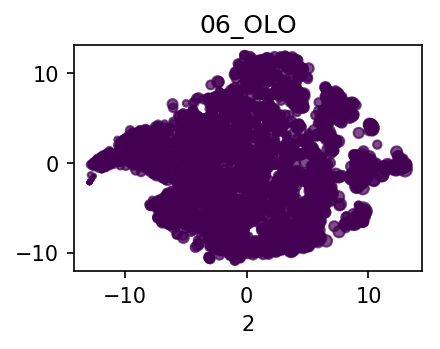

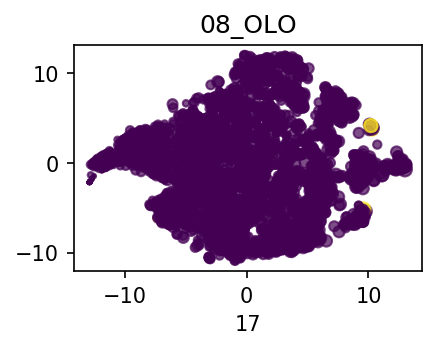

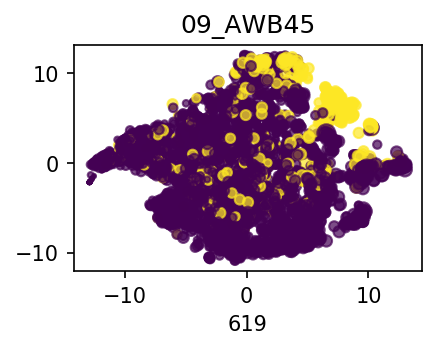

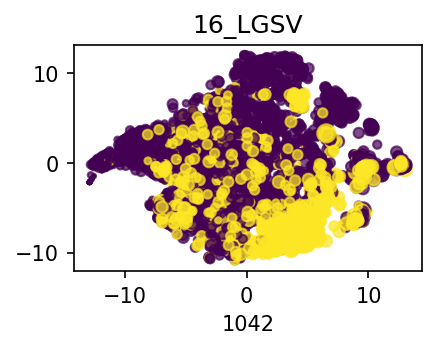

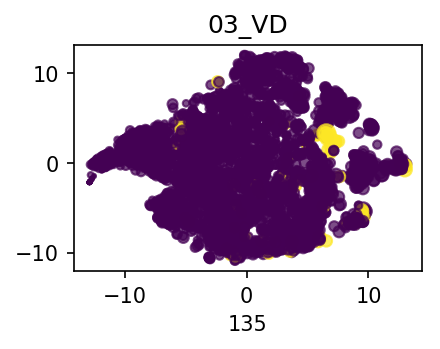

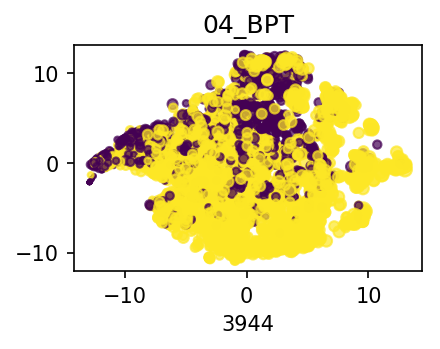

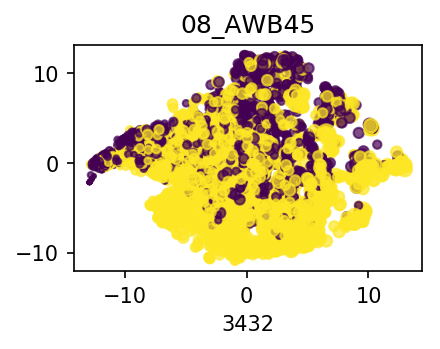

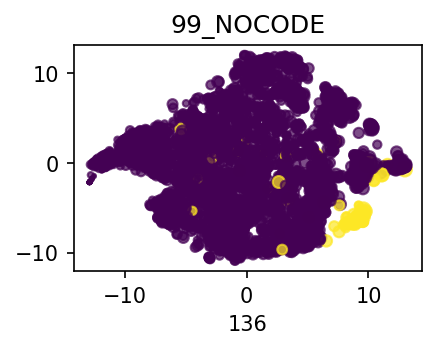

In [183]:
for word in dl:
    y = [1 if word in w.words else 0 for w in corpus]
    plt.figure(figsize=(3, 2), dpi=150)
    plt.scatter(tsne_results[:,0], tsne_results[:,1], alpha=.7, s=trlen, c=y)
    plt.title(word)
    plt.xlabel(np.unique(y, return_counts=True)[1][1])
    plt.show()